## GTZAN Dataset Preparation & Features Computation 

In this jupyter notebook I will explain the preparation of the data as well as the necessary data preprocessing. We are going to classify the genre of an input music clip, but , in order to do so, we havee to choose and compute features for this particular task.

We are going to use the [GTZAN Genre Collection Dataset](http://marsyas.info/downloads/datasets.html), which consists of a total of 1000 audio clips of 30 seconds of duration. The clips are divided into 10 different musical genres (100 clips for each genre). The genres are:

* Blues 
* Classical
* Country
* Disco
* Hip-Hop
* Jazz
* Metal
* Pop
* Reggae
* Rock 

The first thing that should be done is to download the dataset and check out the file structure.

In [1]:
%%script echo Skipping This Cell...
#Comment/delete previous line to properly run this cell
import os 
import tarfile

src_path = os.getcwd()
data_path = os.path.join(src_path, 'dataset')

os.makedirs(data_path, exist_ok=True)

## Download and extract audio files (uncomment following 2 lines if you don't have it installed)
!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz -c -P {data_path}
!tar -xvf {data_path + '/genre.tar.gz'} -C {data_path}

# Delete the compressed dataset 
!rm {data_path + '/genre.tar.gz'}

Skipping This Cell...


In [2]:
import os 
import tarfile

src_path = os.getcwd()
data_path = os.path.join(src_path, 'dataset')
data_path = os.path.join(data_path, 'genre')

# Make sure you have command tree installed in UNIX OS systems. You can install it running !sudo apt-get install tree
!tree -L 1 {data_path}  

/mnt/e/carlos/code/epidemic-sound/genre-classif/dataset/genre
├── blues
├── classical
├── country
├── disco
├── hiphop
├── jazz
├── metal
├── pop
├── reggae
└── rock

10 directories, 0 files


If there is a bunch of manifest (.mf) files along with the genre directories, they can be safely deleted by running cell below. Those files are not going to be used in our classifier and only tells us only information regarding the original audio ID used in GTZAN and its genre.

In [3]:
%%script echo Skipping This Cell...
#Comment/delete previous line to properly run this cell
import pandas as pd

# Just loading one of the manifest files. They are all similar and can be safely deleted
df = pd.read_csv(data_path + '/bextract_single.mf', sep= "\t", header=None, names=['filename', 'genre'])

pd.set_option('max_colwidth', 70)

print(df.head(10))

# Deleting manifest files
!rm {data_path + '/*.mf'}

Skipping This Cell...


Let's whats inside a genre directory.

In [4]:
!ls {data_path + '/blues'} ## All genre directories have its respective audio files

blues.00000.npz  blues.00025.npz  blues.00050.npz  blues.00075.npz
blues.00000.wav  blues.00025.wav  blues.00050.wav  blues.00075.wav
blues.00001.npz  blues.00026.npz  blues.00051.npz  blues.00076.npz
blues.00001.wav  blues.00026.wav  blues.00051.wav  blues.00076.wav
blues.00002.npz  blues.00027.npz  blues.00052.npz  blues.00077.npz
blues.00002.wav  blues.00027.wav  blues.00052.wav  blues.00077.wav
blues.00003.npz  blues.00028.npz  blues.00053.npz  blues.00078.npz
blues.00003.wav  blues.00028.wav  blues.00053.wav  blues.00078.wav
blues.00004.npz  blues.00029.npz  blues.00054.npz  blues.00079.npz
blues.00004.wav  blues.00029.wav  blues.00054.wav  blues.00079.wav
blues.00005.npz  blues.00030.npz  blues.00055.npz  blues.00080.npz
blues.00005.wav  blues.00030.wav  blues.00055.wav  blues.00080.wav
blues.00006.npz  blues.00031.npz  blues.00056.npz  blues.00081.npz
blues.00006.wav  blues.00031.wav  blues.00056.wav  blues.00081.wav
blues.00007.npz  blues.00032.npz  blues.00057.npz  blues.00082

All the genre directories look like these. We should have 100 clips for each genre class. Let's now check the audio files and verify if everything is correct. It is important to know that the first thing that should be done in any machine learning project is to properly prepare the data we are going to use. Some things we will be checking in this project:

* Do all files the same duration?
* Do all files have same number of channels?
* How many files we have for each class?
* Is there any error or NaN values in our dataset?

Since we are dealing with audio files, we shouldn't have any NaN values, but you never know what may happen. Anyway, in order to check for those things, we are going to load the full dataset in a dataframe and show the number of channels in each clip as well as its corresponding label (genre) and duration (in total samples)

In [5]:
import librosa
import numpy as np
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm

## Getting labels from dataset directories
paths = os.listdir(data_path)
labels = sorted(list(set([l for l in paths if os.path.isdir(os.path.join(data_path, l))])))

names = []
durations = []
channels = []
genres = []

# Veryfying Dataset
for l in tqdm(labels, desc="Processing Files of different genres..."):
    filedir = os.path.join(data_path, l)
    for filename in tqdm(glob(os.path.join(filedir, '*.wav')), desc='Loading data...', leave=False):
        audio, fs = librosa.load(filename, sr=22050, mono=False)
        names.append(filename) # name of audio
        durations.append(max(audio.shape)) # duration of audio file
        channels.append(audio.ndim) # number of channels
        genres.append(l) # genre of this audio file

df = pd.DataFrame(list(zip(names,durations,channels, genres)), columns = ['Name', 'Duration', 'Channels', 'Genre'])
## Those are the labels (genres) we are going to work with
print('The labels provided in the dataset are {}'.format(labels))
print('\n')
print("Some rows of the dataframe")
print(df[430:440])

Processing Files of different genres...:   0%|          | 0/10 [00:00<?, ?it/s]

Loading data...:   0%|          | 0/100 [00:00<?, ?it/s]

Loading data...:   0%|          | 0/100 [00:00<?, ?it/s]

Loading data...:   0%|          | 0/100 [00:00<?, ?it/s]

Loading data...:   0%|          | 0/100 [00:00<?, ?it/s]

Loading data...:   0%|          | 0/100 [00:00<?, ?it/s]

Loading data...:   0%|          | 0/100 [00:00<?, ?it/s]

Loading data...:   0%|          | 0/100 [00:00<?, ?it/s]

Loading data...:   0%|          | 0/100 [00:00<?, ?it/s]

Loading data...:   0%|          | 0/100 [00:00<?, ?it/s]

Loading data...:   0%|          | 0/100 [00:00<?, ?it/s]

The labels provided in the dataset are ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


Some rows of the dataframe
                                                  Name  Duration  Channels  \
430  /mnt/e/carlos/code/epidemic-sound/genre-classi...    661760         1   
431  /mnt/e/carlos/code/epidemic-sound/genre-classi...    661408         1   
432  /mnt/e/carlos/code/epidemic-sound/genre-classi...    660000         1   
433  /mnt/e/carlos/code/epidemic-sound/genre-classi...    665280         1   
434  /mnt/e/carlos/code/epidemic-sound/genre-classi...    667700         1   
435  /mnt/e/carlos/code/epidemic-sound/genre-classi...    668140         1   
436  /mnt/e/carlos/code/epidemic-sound/genre-classi...    675808         1   
437  /mnt/e/carlos/code/epidemic-sound/genre-classi...    675808         1   
438  /mnt/e/carlos/code/epidemic-sound/genre-classi...    675808         1   
439  /mnt/e/carlos/code/epidemic-sound/genre-classi...   

We can verify our data by analysing the dataframe. Note that we have some clips with different durations, but they all seem to have the same number of channels. We can easily count this with the help of `pandas` package.

In [6]:
## Number of audio files in each Genre
print(' Number of audio in each Genre:')
print(df['Genre'].value_counts())
print('\n')
print(df.describe())
print('\n')
print('Minimum value of column Duration is {} = {:2.2f} sec, which happens at index {}'.format(df['Duration'].min(),
                                                                                        df['Duration'].min()/fs,
                                                                                        df['Duration'].idxmin()))
print('Maximum value of column Duration is {} = {:2.2f} sec, which happens at index {}'.format(df['Duration'].max(),
                                                                                        df['Duration'].max()/fs,
                                                                                        df['Duration'].idxmax()))
print('\n')
print('Minimum value of channel for an audio file is {}'.format(df['Channels'].min()))
print('Maximum value of channel for an audio file is {}'.format(df['Channels'].max()))

 Number of audio in each Genre:
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: Genre, dtype: int64


            Duration  Channels
count    1000.000000    1000.0
mean   662030.846000       1.0
std      1784.073992       0.0
min    660000.000000       1.0
25%    661504.000000       1.0
50%    661794.000000       1.0
75%    661794.000000       1.0
max    675808.000000       1.0


Minimum value of column Duration is 660000 = 29.93 sec, which happens at index 432
Maximum value of column Duration is 675808 = 30.65 sec, which happens at index 436


Minimum value of channel for an audio file is 1
Maximum value of channel for an audio file is 1


We verified that the actual duration of the audio files can range from 29.93s to 30.65s. Even though it is not the exact same number of samples, this won't be an issue when preparing our features because we can easily pad (or crop) the last miliseconds of the clips without adding much noise (or losing much information). 

The number of channels are always 1, so we don't need to worry with stereo signals. However, if the files were stereo, we could have used information from each channel independently to increase the amount of data to train.

Also, we have confirmed that there is 100 clips for each of the 10 classes. The dataset seems quite balanced in terms of samples per class, which is good.

Now, let's talk about the adopted methodology to implement the classifiers.

## Methodology

Instead of working with large 30-second audio clips, I decided to adopt the methodology of classifying the genre of a short 5-second excerpt. This approach is good for __4__ main reasons:

* __Enough information__: A 5-second music excerpt should contain enough information for humans to make an overall decision about the music genre; 
* __Data Augmentation__: Each file now serves as 6 inputs for training our system. So, instead of having 1000 samples, we can augment our data to 6000;
* __Lower Feature Variance__: Variance of Features over a 5 second "texture window" are lower, which helps the training of ML models;
* __Smaller Inputs__: Spectrograms of a 5 second audio clip have lower dimensions and using smaller inputs is easier and recommended for training CNNs;

I believe it would be interesting to not directly use deep learning models, but also show that it is possible to obtain quite good results using traditional machine learning classifiers. We are going to evaluate and compare their performances in the other jupyter notebook file. In this one we are going to focus on computation of features for using afterwards.

The methods I am going to implement later will be:

1- K-Nearest Neighbors
2- Decision Tree
3- Singular Vector Machine (SVM)
4- Random Forest
5- Naive Bayes Classifier
6- Multi-layer Perceptron (Fully Connected Network)
7- Small Convolutional Neural Network (CNN)
8- Large Convolutional Neural Network (CNN)
9- My own Convolutional Architecture

Apart from CNNs, which can be applied direcly on music spectrograms, the other methods need to be applied to features computed from our audio clips. So, it is important to talk about what type of music features we can use.

## Choice of features

I believe we can choose features that are related to timbre, pitch and rhythm of the music signals. Some feature that I believe that can provide useful insights regarding the music genre are:

* Spectral Centroid;
* Spectral Rolloff 5;
* Spectral Rolloff 85;
* Zero Crossing Rate;
* Low Energy Feature;
* Tempo;
* 5 Mel-Frequency Cepstral Coefficients

Since a music signal is a time domain signal, we are going to compute the mean and variance of features accross the chosen "texture window", which will be the 5-second clip. Remember that it was mentioned before that variance of features over a 5 second texture window should be much lower than their coounterparts computed using a larger texture windows. This should help the training the ML models.

Those features will be explained and exemplified in the next cells for two example signals. 

Let's take and example from *Jazz* and one from *Metal*.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

# Read Example Audio 1
y1, sr = librosa.load(os.path.join(data_path, 'jazz', 'jazz.00020.wav'), sr=22050, duration=5)
# Read Example Audio 2
y2, sr = librosa.load(os.path.join(data_path, 'metal', 'metal.00035.wav'), sr=22050, duration=5)

# Playing audio
print('   Jazz.00020')
ipd.display(ipd.Audio(y1, rate=sr))
print('   Metal.00035')
ipd.display(ipd.Audio(y2, rate=sr))

   Jazz.00020


   Metal.00035


Let's plot their spectrograms

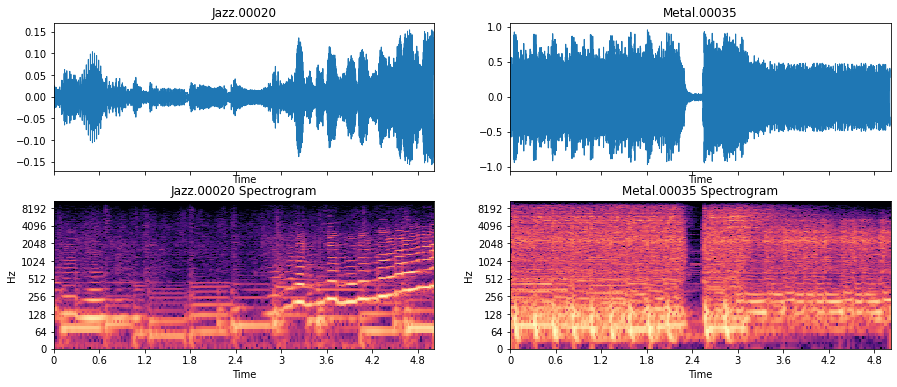

In [8]:
# Compute magnitude spectrograms (STFT)
S1, _ = librosa.magphase(librosa.stft(y=y1))
S2, _ = librosa.magphase(librosa.stft(y=y2))

times= librosa.times_like(S1, sr=sr) # center sample of frames (in sec)

# Plotting waveform and Spectrogram
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,6))
librosa.display.waveplot(y1, sr=sr, ax=ax[0,0])
ax[0,0].set(title='Jazz.00020')
librosa.display.waveplot(y2, sr=sr, ax=ax[0,1])
ax[0,1].set(title='Metal.00035')

librosa.display.specshow(librosa.amplitude_to_db(S1, 
                                                 ref=np.max),
                                                 y_axis='log', 
                                                 x_axis='time', 
                                                 ax=ax[1,0])

librosa.display.specshow(librosa.amplitude_to_db(S2, 
                                                 ref=np.max),
                                                 y_axis='log', 
                                                 x_axis='time', 
                                                 ax=ax[1,1])

ax[1,0].set(title='Jazz.00020 Spectrogram')
ax[1,1].set(title='Metal.00035 Spectrogram')

fig.show()

### Spectral Centroid:

The __spectral centroid__ is defined as the center of gravity of the magnitude spectrum of a signal. The centroid of each frame of a spectrogram is computed to give some sort of measurement of spectral shape. Higher centroid values correspond to “brighter” textures with more high frequencies. 

The function `librosa.feature.spectral_centroid` can be used to compute this feature.

Average centroid for Jazz.00020 is 1094.55 Hz with std deviation 236.38 Hz
Average centroid for Metal.00035 is 2807.46 Hz with std deviation 532.69 Hz


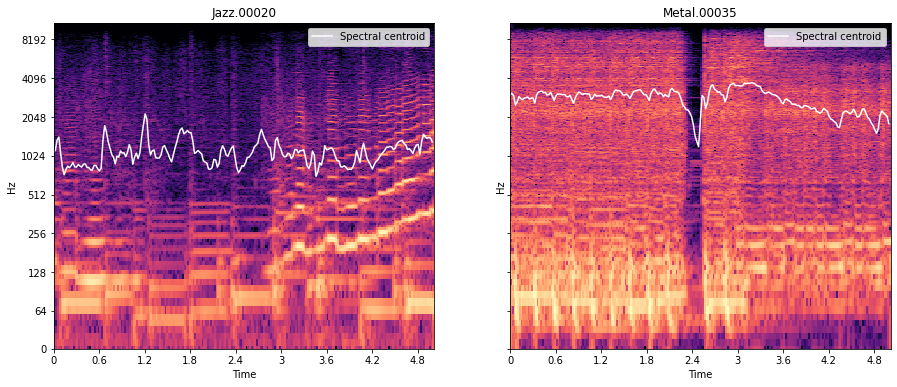

In [9]:
centroids1 = librosa.feature.spectral_centroid(S=S1, sr=sr)
centroids2 = librosa.feature.spectral_centroid(S=S2, sr=sr)

times= librosa.times_like(centroids1, sr=sr) # center sample of frames (in sec)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,6))
librosa.display.specshow(librosa.amplitude_to_db(S1, 
                                                 ref=np.max),
                                                 y_axis='log', 
                                                 x_axis='time', 
                                                 ax=ax1)
ax1.plot(times, centroids1.T, label='Spectral centroid', color='w')
ax1.legend(loc='upper right')
ax1.set(title='Jazz.00020')

librosa.display.specshow(librosa.amplitude_to_db(S2, 
                                                 ref=np.max),
                                                 y_axis='log', 
                                                 x_axis='time', 
                                                 ax=ax2)

ax2.plot(times, centroids2.T, label='Spectral centroid', color='w')
ax2.legend(loc='upper right')
ax2.set(title='Metal.00035');
#fig.colorbar(img)

print("Average centroid for Jazz.00020 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(centroids1), np.std(centroids1)))
print("Average centroid for Metal.00035 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(centroids2), np.std(centroids2)))

### Spectral Rolloff:
__Spectral Rolloff__ is the frequency below which a specified percentage of the total spectral energy lies. We are going to use 2 values for the threshold to get a measure of the spectral shape. 

* Spectral roloff 5%
* Spectral roloff 85%. 

Using a low value of roloff is good because it brings insights of predominant pitches in a spectrogram while using a high value of rolloff is also good to give insights regarding the spectral shape of a music clip. 

The function `librosa.feature.spectral_rolloff` computes the rolloff frequency for each frame in a signal.

>_Another interesting way to interpret the spectral centroids and roloffs is if you analyse the frequency bins of a frame as being samples of a stochastic variable. The spectral centroid can be seen as the mean and the roloff-N as the Nth-percentile of the frequency distribution._

Average roloff 85% for Jazz.00020 is 2536.48 Hz with std deviation 747.61 Hz
Average roloff  5% for Jazz.00020 is 63.50 Hz with std deviation 30.01 Hz
Average roloff 85% Metal.00035 is 5369.39 Hz with std deviation 1031.53 Hz
Average roloff  5% for Metal.00035 is 99.94 Hz with std deviation 34.67 Hz


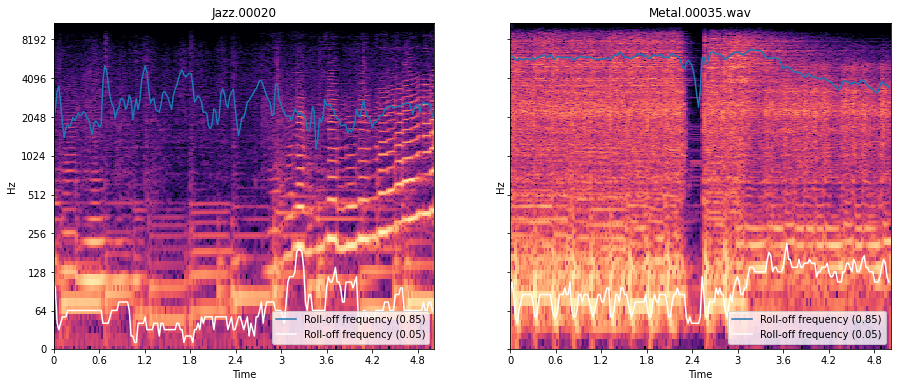

In [10]:
roll85_1 = librosa.feature.spectral_rolloff(S=S1, sr=sr, roll_percent=0.85)
roll85_2 = librosa.feature.spectral_rolloff(S=S2, sr=sr, roll_percent=0.85)
roll05_1 = librosa.feature.spectral_rolloff(S=S1, sr=sr, roll_percent=0.05)
roll05_2 = librosa.feature.spectral_rolloff(S=S2, sr=sr, roll_percent=0.05)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,6))
librosa.display.specshow(librosa.amplitude_to_db(S1, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax1)
ax1.plot(librosa.times_like(times), roll85_1[0], label='Roll-off frequency (0.85)')
ax1.plot(librosa.times_like(times), roll05_1[0], color='w', label='Roll-off frequency (0.05)')
ax1.legend(loc='lower right')
ax1.set(title='Jazz.00020')

librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax2)
ax2.plot(librosa.times_like(times), roll85_2[0], label='Roll-off frequency (0.85)')
ax2.plot(librosa.times_like(times), roll05_2[0], color='w', label='Roll-off frequency (0.05)')
ax2.legend(loc='lower right')
ax2.set(title='Metal.00035.wav');

print("Average roloff 85% for Jazz.00020 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(roll85_1), np.std(roll85_1)))
print("Average roloff  5% for Jazz.00020 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(roll05_1), np.std(roll05_1)))
print("Average roloff 85% Metal.00035 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(roll85_2), np.std(roll85_2)))
print("Average roloff  5% for Metal.00035 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(roll05_2), np.std(roll05_2)))

### Low-Energy Feature:

The __Low-Energy feature__ is defined as the percentage of analysis windows (frames) that have less energy than the average energy across the whole texture window (5-second clip). To illustrate, vocal music with lots of silences tend to have larger low-energy values, while continuous strings will have smaller low-energy value. 

We create a function that computes the low energy feature by first computing the root-mean-square (RMS) energy value for each frame of a spectrogram S, and then computing the percentage of frames that are below the average RMS value. 

Observe that the low-energy feature is already a measure of average per se, so it doesn't make sense computing a variance over the texture window.

Low-Energy feature for file Jazz.00020.wav  is 0.60
Low-Energy feature for file Metal.00035.wav is 0.50


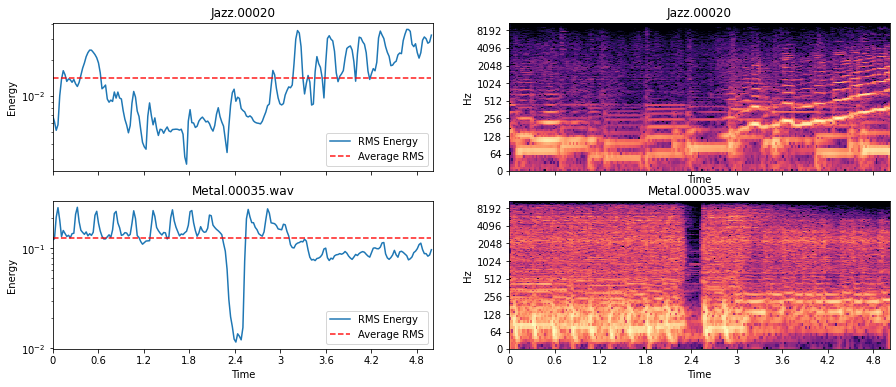

In [11]:
def computeLEfeature(S):
    """
    Computes low energy feature, i.e.,the percentage of frames
    that have less RMS energy than the average RMS energy across the clip

    Parameters
        ----------    
        S : np.ndarray [shape=(d, t)]
            Spectrogram magnitude.

    Returns
        ----------
        le_feature : np.ndarray [shape=(1, t)]
            Low-Energy Feature
    """
    # Compute power spectrogram
    x = np.abs(S) ** 2

    # Adjust the DC and sr/2 component 
    x[0] *= 0.5
    x[-1] *= 0.5

    # Make sure to use frame_length that is even. Computed using spectrogram shape
    frame_length = (np.shape(S)[0] - 1) * 2 

    # Calculate power
    rms_power = np.sqrt(2 * np.sum(x, axis=0) / frame_length ** 2) # we need to divide by frame_length ** 2 cause librosa.stft
                                                                   # gives unormalized values in S (from 0 to frame_length) 
    avg_rms = np.mean(rms_power)

    low_energy = np.count_nonzero(rms_power < avg_rms - 1e-6) # we use this small threshold to prevent small computation errors.
                                                              # Ex. pure sine waves (constant RMS) would have wrong low_energy

    return low_energy / np.shape(S)[1]

## Example
rms1 = librosa.feature.rms(S=S1)
le_feature1 = computeLEfeature(S1)
rms2 = librosa.feature.rms(S=S2)
le_feature2 = computeLEfeature(S2)

print('Low-Energy feature for file Jazz.00020.wav  is {:.2f}'.format(le_feature1))
print('Low-Energy feature for file Metal.00035.wav is {:.2f}'.format(le_feature2))
times = librosa.times_like(rms1)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,6))
ax[0,0].semilogy(times, rms1[0], label='RMS Energy')
ax[0,0].semilogy(times, np.full_like(times, np.mean(rms1)), color='r', alpha=0.9, linestyle='--', label='Average RMS')
ax[0,0].set(title='Jazz.00020')
ax[0,0].set(xlabel='Time')
ax[0,0].set(ylabel='Energy')
#ax[0,0].set(xticks=[])
ax[0,0].legend(loc='lower right')
ax[0,0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S1, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0,1])
ax[0,1].set(title='Jazz.00020')

ax[1,0].semilogy(times, rms2[0], label='RMS Energy')
ax[1,0].semilogy(times, np.full_like(times, np.mean(rms2)), color='r', alpha=0.9, linestyle='--', label='Average RMS')
ax[1,0].set(title='Metal.00035.wav')
#ax[1,0].set(xticks=[])
ax[1,0].legend(loc='lower right')
ax[1,0].label_outer()
ax[1,0].set(xlabel='Time')
ax[1,0].set(ylabel='Energy')

librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1,1])
ax[1,1].set(title='Metal.00035.wav');

### Zero-Crossing Rate
__Zero-Crossing Rate__ is a measure of the number of times in a given interval that the amplitude of a music/speech signal passes through the value of _zero_. The zero-crossing occurs when successive samples have different algebraic signs. 

The rate at which zero-crossings occur is a simple measure of the frequency content of a signal.
The function `librosa.feature.zero_crossing_rate` computes the zero-crossing rate feature.


Average zero-crossing rate for file Jazz.00020.wav is 0.0263 with std deviation 0.0137
Average zero-crossing rate for file Metal.00035.wav is 0.1627 with std deviation of 0.0541


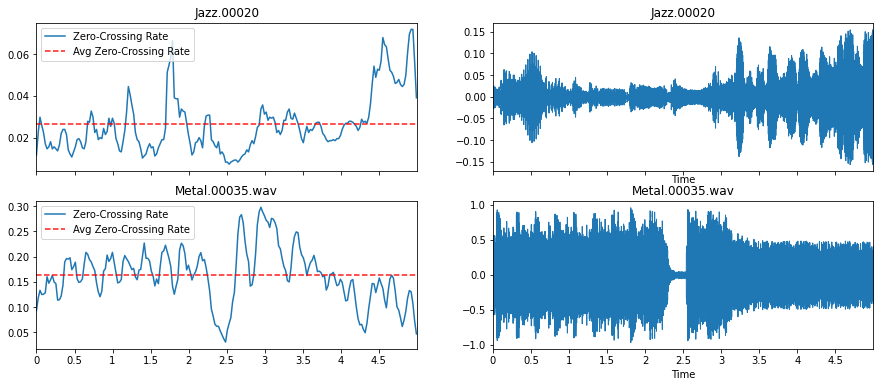

In [12]:
z1 = librosa.feature.zero_crossing_rate(y1, frame_length=2048, hop_length=512, center=True)
z2 = librosa.feature.zero_crossing_rate(y2, frame_length=2048, hop_length=512, center=True)

avg_z1 = np.mean(z1)
avg_z2 = np.mean(z2)


times = librosa.times_like(rms1)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,6))
ax[0,0].plot(times, z1[0], label='Zero-Crossing Rate')
ax[0,0].plot(times, np.full_like(times, avg_z1), color='r', alpha=0.9, linestyle='--', label='Avg Zero-Crossing Rate')
ax[0,0].set(title='Jazz.00020')
ax[0,0].legend()
ax[0,0].label_outer()

#librosa.display.specshow(librosa.amplitude_to_db(S1, ref=np.max),
#                         y_axis='log', x_axis='time', ax=ax[0,1])

librosa.display.waveplot(y1, sr=sr, ax=ax[0,1])
ax[0,1].set(title='Jazz.00020')

ax[1,0].plot(times, z2[0], label='Zero-Crossing Rate')
ax[1,0].plot(times, np.full_like(times, avg_z2), color='r', alpha=0.9, linestyle='--', label='Avg Zero-Crossing Rate')
ax[1,0].set(title='Metal.00035.wav')
ax[1,0].legend()
ax[1,0].label_outer()

#librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max),
#                         y_axis='log', x_axis='time', ax=ax[1,1])
librosa.display.waveplot(y2, sr=sr, ax=ax[1,1])
ax[1,1].set(title='Metal.00035.wav')

print('Average zero-crossing rate for file Jazz.00020.wav is {:.4f} with std deviation {:.4f}'.format(avg_z1, np.std(z1)))
print('Average zero-crossing rate for file Metal.00035.wav is {:.4f} with std deviation of {:.4f}'.format(avg_z2, np.std(z2)))

### Average Tempo
The __Tempo__ of a music signal can give us information regarding the rhythm of the music signal. I believe pop and disco music will tend to have a lower tempo than metal or blues music clips, for example. This should be a good indication to help classify the musical genre.

Usually, the tempo is estimated in beats per minute and the `librosa.beat.tempo` function can be used for giving us a good dynamic (changes over time) music tempo predictions.  

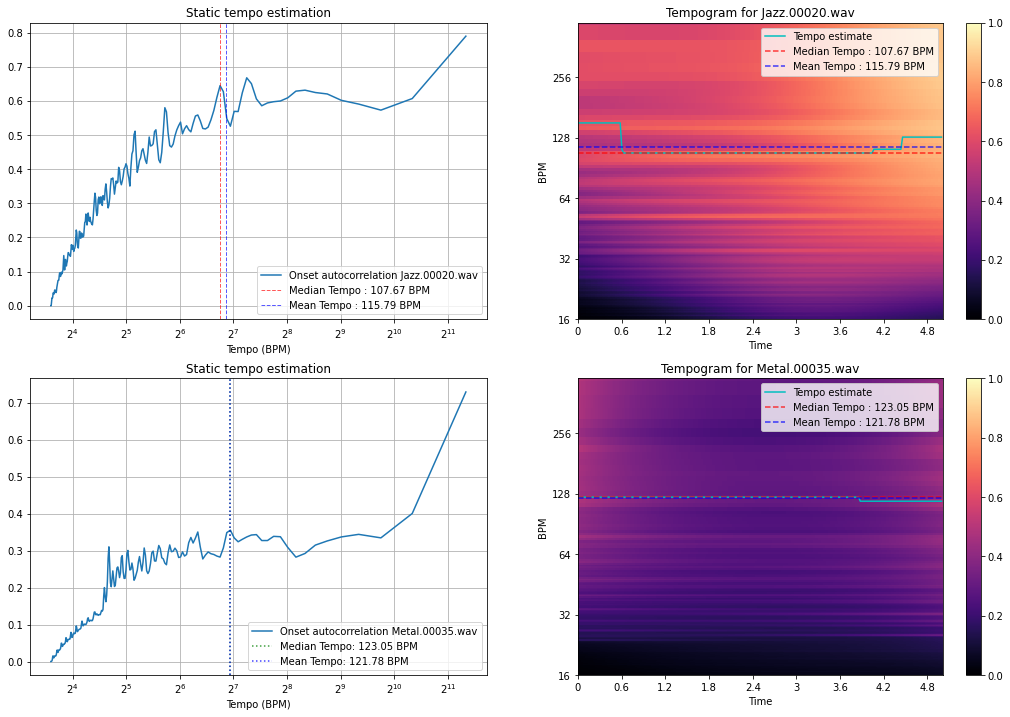

In [13]:
# Estimate a static tempo
onset_env1 = librosa.onset.onset_strength(y1, sr=sr)
onset_env2 = librosa.onset.onset_strength(y2, sr=sr)

# Estimate a dynamic tempo (a vector with tempo estimates for frame)
dtempo1 = librosa.beat.tempo(onset_envelope=onset_env1, sr=sr, aggregate=None)
dtempo2 = librosa.beat.tempo(onset_envelope=onset_env2, sr=sr, aggregate=None)

# Compute 2-second windowed autocorrelation
hop_length = 512
ac1 = librosa.autocorrelate(onset_env1, 5 * sr // hop_length)
ac2 = librosa.autocorrelate(onset_env2, 5 * sr // hop_length)
freqs1 = librosa.tempo_frequencies(len(ac1), sr=sr, hop_length=hop_length)
freqs2 = librosa.tempo_frequencies(len(ac2), sr=sr, hop_length=hop_length)

tg1 = librosa.feature.tempogram(onset_envelope=onset_env1, sr=sr, hop_length=hop_length)
tg2 = librosa.feature.tempogram(onset_envelope=onset_env2, sr=sr, hop_length=hop_length)


## On following plots observe that median value is better than mean for tempo estimation
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

# Plot Tempo and onset strength BPM axis.  We skip the first (0-lag) bin.
ax[0,0].semilogx(freqs1[1:], librosa.util.normalize(ac1)[1:], label='Onset autocorrelation Jazz.00020.wav', base=2)
ax[0,0].axvline(np.median(dtempo1), 0, 1, alpha=0.65, linestyle='--', linewidth=1, color='r', label='Median Tempo : {:.2f} BPM'.format(np.median(dtempo1)))
ax[0,0].axvline(np.mean(dtempo1), 0, 1, alpha=0.65, linestyle='--', linewidth=1, color='b', label='Mean Tempo : {:.2f} BPM'.format(np.mean(dtempo1)))
ax[0,0].set(xlabel='Tempo (BPM)', title='Static tempo estimation')
ax[0,0].grid(True)
ax[0,0].legend()

# Plot Tempo and onset strength BPM axis.  We skip the first (0-lag) bin.
ax[1,0].semilogx(freqs2[1:], librosa.util.normalize(ac2)[1:], label='Onset autocorrelation Metal.00035.wav', base=2)
ax[1,0].axvline(np.median(dtempo2), 0, 1, alpha=0.75, linestyle=':', color='g', label='Median Tempo: {:.2f} BPM'.format(np.median(dtempo2)))
ax[1,0].axvline(np.mean(dtempo2), 0, 1, alpha=0.75, linestyle=':', color='b', label='Mean Tempo: {:.2f} BPM'.format(np.mean(dtempo2)))
ax[1,0].set(xlabel='Tempo (BPM)', title='Static tempo estimation')
ax[1,0].grid(True)
ax[1,0].legend()

# Plot dynamic tempo estimates over a tempogram. Observe difference between using mean and median tempo value. 
img1 = librosa.display.specshow(tg1, x_axis='time', y_axis='tempo', cmap='magma', ax=ax[0,1])
ax[0,1].plot(librosa.times_like(dtempo1), dtempo1, color='c', linewidth=1.5, label='Tempo estimate')
ax[0,1].axhline(np.median(dtempo1), librosa.times_like(dtempo1)[0], librosa.times_like(dtempo1)[-1], alpha=0.75, linestyle='--', color='r', label='Median Tempo : {:.2f} BPM'.format(np.median(dtempo1)))
ax[0,1].axhline(np.mean(dtempo1), librosa.times_like(dtempo1)[0], librosa.times_like(dtempo1)[-1], alpha=0.75, linestyle='--', color='b', label='Mean Tempo : {:.2f} BPM'.format(np.mean(dtempo1)))
ax[0,1].set(title='Tempogram for Jazz.00020.wav')
ax[0,1].legend()

# Plot dynamic tempo estimates over a tempogram. Observe difference between using mean and median tempo value. 
img2 = librosa.display.specshow(tg2, x_axis='time', y_axis='tempo', cmap='magma', ax=ax[1,1])
ax[1,1].plot(librosa.times_like(dtempo2), dtempo2, color='c', linewidth=1.5, label='Tempo estimate')
ax[1,1].axhline(np.median(dtempo2), librosa.times_like(dtempo2)[0], librosa.times_like(dtempo2)[-1], alpha=0.75, linestyle='--', color='r', label='Median Tempo : {:.2f} BPM'.format(np.median(dtempo2)))
ax[1,1].axhline(np.mean(dtempo2), librosa.times_like(dtempo2)[0], librosa.times_like(dtempo2)[-1], alpha=0.75, linestyle='--', color='b', label='Mean Tempo : {:.2f} BPM'.format(np.mean(dtempo2)))
ax[1,1].set(title='Tempogram for Metal.00035.wav')
ax[1,1].legend()

fig.colorbar(img1, ax=[ax[0,1]]);
fig.colorbar(img2, ax=[ax[1,1]]);

### Mel-Frequency Cepstral Coefficients (MFCCs):
Mel-frequency cepstral coefficients are perceptually motivated features that are also based on the STFT. After taking the log-amplitude of the power spectrum, the FFT bins are grouped and smoothed according to the perceptually motivated Mel-frequency scaling. Finally, a discrete cosine transform is applied in order to obtain the MFCCs. 

Typically, 13 coefficients are used for speech representation. But since we have other features to help us, we are going to use only the first 5 MFCCs. Remember we have to use the mean and variance of those values across the 5-second clip, so we don't want to have too many similar features as input to our classifiers.

It is possible to say that MFCCs are "a super compact representation of the Mel spectrogram". It tells us information about the acoustic properties of the sources that are generating the sounds. When analysing speech signals, for example, MFCC is a powerful feature for recognising the speaker or the formants of the words that were spoken. However, when analysing music signals, since there are many sources producing sounds and the signals involved are much more correlated and complexes, the MFCCs are not that powerful, but they can still be used to give us insights about the music.

The function `librosa.melspectrogram` can compute mel spectrograms while `librosa.feature.mfcc` can compute the MFCCs.

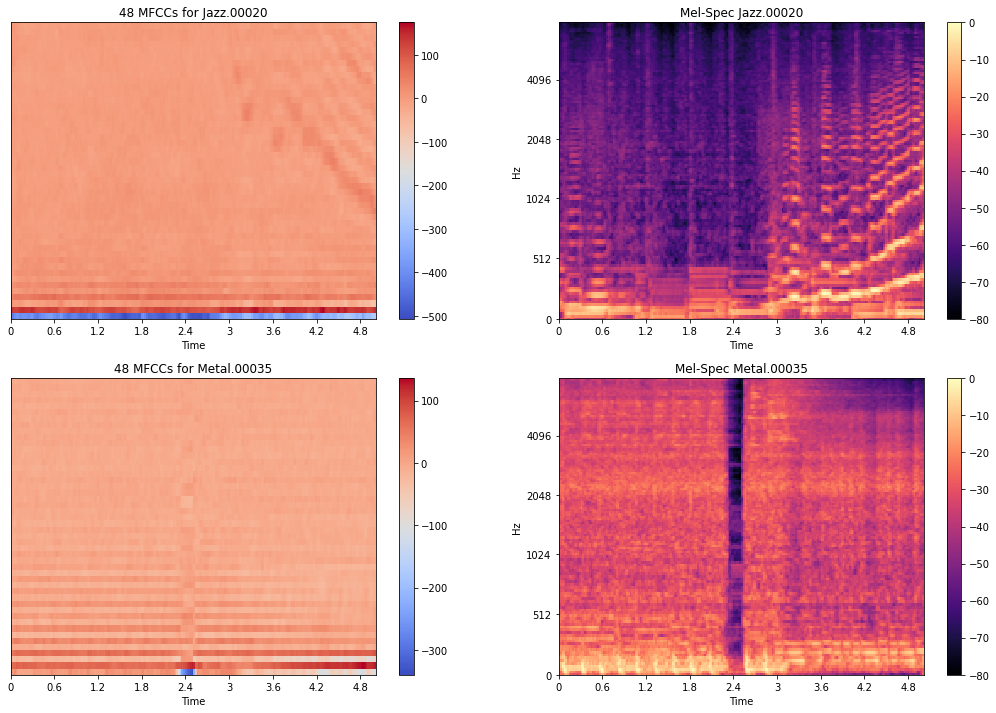

In [14]:
# compute mel spec and MFCC for example 1
M1 = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=128, fmax=8000)
M1_dB = librosa.power_to_db(M1, ref=np.max)
mfcc1= librosa.feature.mfcc(y=y1, n_mfcc=48)

# compute mel spec and MFCC for example 2
M2 = librosa.feature.melspectrogram(y=y2, sr=sr, n_mels=128, fmax=8000)
M2_dB = librosa.power_to_db(M2, ref=np.max)
mfcc2 = librosa.feature.mfcc(y=y2, n_mfcc=48)

# Plot MFCC
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
img = librosa.display.specshow(mfcc1, x_axis='time', ax=ax[0,0])
fig.colorbar(img, ax=ax[0,0])
ax[0,0].set(title='48 MFCCs for Jazz.00020')

# Plot MFCC
img = librosa.display.specshow(mfcc2, x_axis='time', ax=ax[1,0])
fig.colorbar(img, ax=ax[1,0])
ax[1,0].set(title='48 MFCCs for Metal.00035')

# Plot Mel-Spec
img = librosa.display.specshow(M1_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax[0,1])
fig.colorbar(img, ax=ax[0,1])
ax[0,1].set(title='Mel-Spec Jazz.00020')

# Plot Mel-Spec
img = librosa.display.specshow(M2_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax[1,1])
fig.colorbar(img, ax=ax[1,1])
ax[1,1].set(title='Mel-Spec Metal.00035');


## Preparing data - Computing features

Now that we have done an overview of the features, let's compute them for all the clips of GTZAN and save in a dataframe so we can use to train our classifiers later.

In [15]:
import os
import glob
import librosa
import numpy as np
import tqdm
from tqdm.notebook import tqdm

fs = 22050  # Sampling frequency
n_fft = 2048 # window size for FFT
hop_length = 512 # N_samples to hop from a window to next when computing STFT
input_duration = 5*fs # input duration. We have chosen 5 second clips
n_inputs = int(30*fs // input_duration)
n_frames_input = (input_duration - 1) // hop_length + 1

# variables to store features
clipnames = []
genres = []

centr, centr_std = [], [] 
roll85, roll85_std =  [], []
roll05, roll05_std = [], [],
zcr, zcr_std = [], []
tempo = []
lef = []

# mfcc features
mfcc0, mfcc0_std = [], []
mfcc1, mfcc1_std = [], []
mfcc2, mfcc2_std = [], []
mfcc3, mfcc3_std = [], []
mfcc4, mfcc4_std = [], []

data_path = os.path.join(os.getcwd(), 'dataset', 'genre')
paths = os.listdir(data_path)
labels = sorted(list(set([l for l in paths if os.path.isdir(os.path.join(data_path, l))])))

def fixColumns(S, n_inputs, n_columns_input):
    """
    Pads or crops the columns of matrix to make sure S.shape[1] == n_inputs*n_columns_input

    Parameters
        ----------    
        S : np.ndarray [shape=(d, t)]
            (required) any 2D matrix.
        
        n_inputs : int (required) number of inputs that matrix should generate.
        
        n_columns_input : int (required) number of columns in a single input

    Returns
        ----------
        S : np.ndarray [shape=(d, n_inputs*n_columns_input)]
            S Padded or Cropped
    """
    n_pad = n_inputs*n_columns_input - S.shape[1]
    if n_pad > 0:
        S = np.concatenate([S, S[:,-n_pad:]], axis=1)
    elif n_pad < 0:
        S = S[:,:n_inputs*n_columns_input]
    return S

for l in tqdm(labels, desc='Processing files...'):
    filedir = os.path.join(data_path, l)
    for filename in tqdm(glob.glob(os.path.join(filedir, '*.wav')), desc='Processing files of genre {}'.format(l), leave=False):
        #print('Computing Features for file {}'.format(filename))
        audio, fs = librosa.load(os.path.join(filedir, filename), sr=fs, mono=True)
        audio = audio/np.max(np.abs(audio)) # make sure it is from -1 to 1

        # Some features are computed directly on time-domain signal
        Z = librosa.feature.zero_crossing_rate(audio, frame_length=n_fft, hop_length=hop_length) # zero-crossing rate 
        T = librosa.beat.tempo(y=audio, sr=fs, hop_length=hop_length, aggregate=None)[np.newaxis,:] # Tempo (expand dimension to make it same shape as rest)
        MFCC= librosa.feature.mfcc(y=audio, sr=fs, n_fft=n_fft, hop_length=hop_length, n_mels=128, fmax=8000, n_mfcc=5) # MFCCS

        # Compute STFT
        S = librosa.stft(y=audio, n_fft=n_fft, hop_length=hop_length, win_length=n_fft)
        S, _ = librosa.magphase(S)
        
        # Little padding is done if input is less than 30 sec
        S = fixColumns(S, n_inputs, n_frames_input)
        Z = fixColumns(Z, n_inputs, n_frames_input)
        T = fixColumns(T, n_inputs, n_frames_input)
        MFCC = fixColumns(MFCC, n_inputs, n_frames_input)

        for i in range(n_inputs):
            clipname = filename.split('.wav')[0] + '_'+ str(i) + '.wav'

            s    = S[:,i*n_frames_input:(i+1)*n_frames_input]
            z    = Z[:,i*n_frames_input:(i+1)*n_frames_input]
            t    = T[:,i*n_frames_input:(i+1)*n_frames_input]
            mfcc = MFCC[:,i*n_frames_input:(i+1)*n_frames_input]

            ## Computing other feaatures and ignoring initial and last frames to avoid padding and windowing problems
            c = librosa.feature.spectral_centroid(S=s, sr=fs, n_fft=n_fft, hop_length=hop_length)[:,1:-1]
            r85 = librosa.feature.spectral_rolloff(S=s, sr=fs, n_fft=n_fft, hop_length=hop_length, roll_percent=0.85)[:,1:-1]
            r05 = librosa.feature.spectral_rolloff(S=s, sr=fs, n_fft=n_fft, hop_length=hop_length, roll_percent=0.05)[:,1:-1]
            
            clipnames.append(clipname)
            genres.append(l)
            centr.append(np.float32(np.mean(c)))
            centr_std.append(np.float32(np.std(c)))
            roll85.append(np.float32(np.mean(r85)))
            roll85_std.append(np.float32(np.std(r85)))
            roll05.append(np.float32(np.mean(r05)))
            roll05_std.append(np.float32(np.std(r05)))
            zcr.append(np.float32(np.mean(z[:,1:-1])))
            zcr_std.append(np.float32(np.std(z[:,1:-1])))
            tempo.append(np.float32(np.median(t[:,1:-1])))
            lef.append(np.float32(computeLEfeature(s[:,1:-1])))
            mfcc0.append(np.float32(np.mean(mfcc[0,1:-1])))
            mfcc1.append(np.float32(np.mean(mfcc[1,1:-1])))
            mfcc2.append(np.float32(np.mean(mfcc[2,1:-1])))
            mfcc3.append(np.float32(np.mean(mfcc[3,1:-1])))
            mfcc4.append(np.float32(np.mean(mfcc[4,1:-1])))
            mfcc0_std.append(np.float32(np.std(mfcc[0,1:-1])))
            mfcc1_std.append(np.float32(np.std(mfcc[1,1:-1])))
            mfcc2_std.append(np.float32(np.std(mfcc[2,1:-1])))
            mfcc3_std.append(np.float32(np.std(mfcc[3,1:-1])))
            mfcc4_std.append(np.float32(np.std(mfcc[4,1:-1])))

Processing files...:   0%|          | 0/10 [00:00<?, ?it/s]

Processing files of genre blues:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre classical:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre country:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre disco:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre hiphop:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre jazz:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre metal:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre pop:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre reggae:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre rock:   0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
df = pd.DataFrame(list(zip(clipnames,
                           genres,
                           centr,
                           centr_std,
                           roll85, 
                           roll85_std,
                           roll05, 
                           roll05_std,
                           zcr, 
                           zcr_std,
                           tempo, 
                           lef, 
                           mfcc0, 
                           mfcc0_std, 
                           mfcc1, 
                           mfcc1_std, 
                           mfcc2, 
                           mfcc2_std, 
                           mfcc3, 
                           mfcc3_std, 
                           mfcc4, 
                           mfcc4_std)), columns = ['Name',
                                                   'Genre', 
                                                   'Centroid', 
                                                   'Centroid Std', 
                                                   'Rolloff 85%', 
                                                   'Rolloff 85% Std', 
                                                   'Rolloff 05%', 
                                                   'Rolloff 05% Std',
                                                   'Zero-Crossing Rate',
                                                   'Zero-Crossing Rate (Std)',
                                                   'Tempo',
                                                   'Low Energy Ratio',
                                                   'MFCC-0',
                                                   'MFCC-0 Std',
                                                   'MFCC-1',
                                                   'MFCC-1 Std',
                                                   'MFCC-2',
                                                   'MFCC-2 Std',
                                                   'MFCC-3',
                                                   'MFCC-3 Std',
                                                   'MFCC-4',
                                                   'MFCC-4 Std'])
# Saving as csv file on ./dataset/features.csv
df.to_csv(os.path.join(os.path.split(data_path)[0], 'features.csv'), sep=',', index=False)  
ipd.display(df.head(5))
ipd.display(df.describe())
ipd.display(df.info())

,Name,Genre,Centroid,Centroid Std,Rolloff 85%,Rolloff 85% Std,Rolloff 05%,Rolloff 05% Std,Zero-Crossing Rate,Zero-Crossing Rate (Std),...,MFCC-0,MFCC-0 Std,MFCC-1,MFCC-1 Std,MFCC-2,MFCC-2 Std,MFCC-3,MFCC-3 Std,MFCC-4,MFCC-4 Std
0,/mnt/e/carlos/code/epidemic-sound/genre-classi...,blues,1776.623657,377.172333,3738.626953,985.051636,88.648376,36.565563,0.084349,0.028513,...,-76.225548,47.812977,92.672897,14.645846,-0.869542,19.100159,26.020918,15.581945,5.278316,9.272931
1,/mnt/e/carlos/code/epidemic-sound/genre-classi...,blues,1785.824341,304.094940,3941.230225,822.785217,77.177414,36.592415,0.076144,0.023925,...,-91.701820,56.353924,87.307205,13.573576,8.877044,13.475040,31.626858,15.997764,7.072044,11.073791
2,/mnt/e/carlos/code/epidemic-sound/genre-classi...,blues,1641.836548,312.723938,3501.359131,862.119812,83.768188,31.730270,0.070274,0.016688,...,-63.532482,49.678787,101.299103,16.561068,2.802329,13.072867,20.934095,11.660361,0.627936,10.978201
3,/mnt/e/carlos/code/epidemic-sound/genre-classi...,blues,1974.148560,453.609161,4329.532227,1072.726562,87.239662,38.382683,0.093613,0.035050,...,-62.029247,52.925179,83.612183,18.532612,7.062488,15.529668,25.633169,12.685728,2.365620,10.459905
4,/mnt/e/carlos/code/epidemic-sound/genre-classi...,blues,1762.885864,341.773041,3810.773193,921.772217,96.647858,42.882904,0.074839,0.020703,...,-65.729362,46.212124,93.085548,14.109302,2.104553,16.896526,22.881002,14.509435,2.742398,11.131560


,Centroid,Centroid Std,Rolloff 85%,Rolloff 85% Std,Rolloff 05%,Rolloff 05% Std,Zero-Crossing Rate,Zero-Crossing Rate (Std),Tempo,Low Energy Ratio,MFCC-0,MFCC-0 Std,MFCC-1,MFCC-1 Std,MFCC-2,MFCC-2 Std,MFCC-3,MFCC-3 Std,MFCC-4,MFCC-4 Std
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2201.908203,590.893066,4571.730957,1187.104492,112.464523,59.895870,0.103645,0.045297,120.330803,0.552607,-92.277580,51.477509,78.493401,22.813469,5.921551,18.227589,26.618999,13.800624,4.289831,11.205427
std,740.911072,289.410645,1621.732300,531.981689,47.546387,56.731606,0.044713,0.026109,21.014042,0.066405,79.095245,21.567171,30.905146,8.384602,18.692680,6.348864,12.415406,4.634381,9.933605,3.697543
min,487.308167,40.833130,674.623169,35.415241,7.647306,6.407525,0.013177,0.000211,41.677166,0.247664,-456.900543,5.881482,-9.670356,4.976051,-83.175949,3.936336,-25.023611,3.206119,-48.104664,3.356739
25%,1634.270782,376.431129,3373.631653,798.147034,82.510406,29.574923,0.068341,0.026935,103.359375,0.509346,-140.294502,36.560560,56.340630,16.558676,-6.276621,13.660334,18.658586,10.191665,-1.869011,8.384708
50%,2221.256348,540.484253,4647.474121,1116.774963,104.093918,44.703623,0.098912,0.039314,117.453835,0.551402,-79.236240,48.643847,73.789387,21.642152,5.988638,17.500527,26.063918,13.399744,4.486362,10.652943
75%,2711.888428,762.429825,5585.715332,1528.962646,130.331219,70.255024,0.133581,0.057600,130.049213,0.593458,-35.359819,63.960252,96.829824,27.948491,17.612861,22.029423,34.098016,16.843120,10.901721,13.542294
max,5415.240723,2099.999268,9483.615234,3457.739014,552.920349,983.416992,0.323121,0.222071,198.768036,0.873832,104.664154,219.285217,213.294174,78.261627,81.890671,48.965626,78.311798,33.840073,42.406013,30.719820


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      6000 non-null   object 
 1   Genre                     6000 non-null   object 
 2   Centroid                  6000 non-null   float32
 3   Centroid Std              6000 non-null   float32
 4   Rolloff 85%               6000 non-null   float32
 5   Rolloff 85% Std           6000 non-null   float32
 6   Rolloff 05%               6000 non-null   float32
 7   Rolloff 05% Std           6000 non-null   float32
 8   Zero-Crossing Rate        6000 non-null   float32
 9   Zero-Crossing Rate (Std)  6000 non-null   float32
 10  Tempo                     6000 non-null   float32
 11  Low Energy Ratio          6000 non-null   float32
 12  MFCC-0                    6000 non-null   float32
 13  MFCC-0 Std                6000 non-null   float32
 14  MFCC-1  

None

We have finished computing the features we are going to use to train the ML models. 

## Computing and Saving Spectrograms
Right now, we should prepare the data for the other deep-learning-based models, which should receive music spectrograms as inputs. Of course they can be computed on the fly, but we can make our training faster by saving the processed and normalized spectrograms directly on our hard disk with the correct shape and directly load them to our models later. 

In [17]:
n_mels=128        # number of mels we use on mel spec
f_min=0           # minimum frequency to compute mel-freq filterbank
f_max=10000       # maximum frequency for mel-freq filterbank
lowest_db = -60   # lowest decibel value for mel-spectrogram. Lower values from lowest_db will be put to lowest_db

for l in tqdm(labels, desc='Processing files...'):   
    filedir = os.path.join(data_path, l)
    for filename in tqdm(glob.glob(os.path.join(filedir, '*.wav')), desc='Processing files of genre {}'.format(l), leave=False):
        #print('Computing Features for file {}'.format(filename))
        audio, fs = librosa.load(os.path.join(filedir, filename), sr=fs, mono=True)
        audio = audio/np.max(np.abs(audio)) # make sure it is from -1 to 1

        # Some features are computed directly on time-domain signal
        
        # Compute Mel-STFT
        M = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, fmin=f_min, fmax=f_max)
        # Mapping from linear power to decibel
        
        M = librosa.power_to_db(M, ref=np.max, top_db=-lowest_db) ## This goes from lowest_db to 0
        
        # Normalizing from 0 to 1
        M = (1.0 /-lowest_db) * M + 1.0 
        
        
        # Little padding or cropping is done depending if input is slightly lower or larger than 30 sec
        M = fixColumns(M, n_inputs, n_frames_input)
        
        ## transforming large 30-sec spectrogram to multiple 5-sec spectrogram 
        M = M.reshape((M.shape[0], n_frames_input, -1), order='F')
        
        # Reshaping for tensorflow.keras. 
        M = np.transpose(M, (2, 0, 1))
        M = np.expand_dims(M, -1)
    
        # Here M should have shape (n_inputs, n_mels, n_frames_input, 1)
              
        # we are going to save 1 npz file per audio
        npz_name = filename.split('.wav')[0] + '.npz'
        target = np.array(M.shape[0]*[l])
        
        np.savez(npz_name, spec=M, genre=target)

Processing files...:   0%|          | 0/10 [00:00<?, ?it/s]

Processing files of genre blues:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre classical:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre country:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre disco:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre hiphop:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre jazz:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre metal:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre pop:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre reggae:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre rock:   0%|          | 0/100 [00:00<?, ?it/s]

We have now concluded the data preparation. Now you should take a look on the other jupyter notebook `trainModels.ipynb` to checkout how we can effectivelly build a music genre classifier.